In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

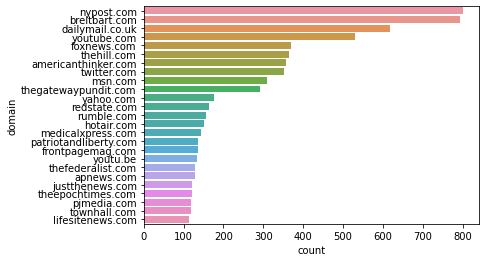

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

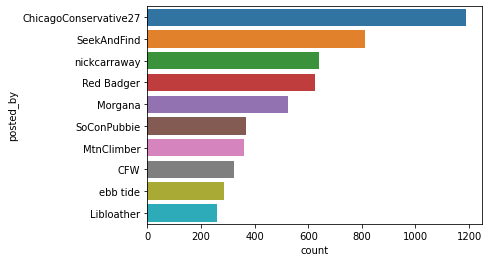

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                            count unique   
domain               posted_by                             
americanthinker.com  CFW                        1      1   
                     MtnClimber               165      1   
                     Red Badger                 1      1   
                     SeekAndFind              142      1   
                     SoConPubbie                1      1   
                     ebb tide                   1      1   
apnews.com           Red Badger                 2      1   
                     SeekAndFind                1      1   
                     ChicagoConservative27      2      1   
                     Morgana                    2      1   
                     nickcarraway               2      1   
breitbart.com        CFW                        8      1   
                     Red Badger                 7      1   
                     SeekAndFind                3      1   
                     SoConPubbie              145      1   
                     ebb tide                   2      1   
                     ChicagoConservative27    461      1   
                     Morgana                   15      1   
dailymail.co.uk      CFW                        3      1   
                     Red Badger                16      1   
                     SeekAndFind                1      1   
                     ChicagoConservative27      4      1   
                     Morgana                  177      1   
                     nickcarraway               3      1   
                     Libloather               113      1   
foxnews.com          CFW                       22      1   
                     Red Badger                 3      1   
                     SeekAndFind                1      1   
                     ChicagoConservative27     33      1   
                     Morgana                    7      1   
                     nickcarraway              19      1   
                     Libloather                71      1   
frontpagemag.com     CFW                        2      1   
                     MtnClimber                14      1   
                     Red Badger                 2      1   
hotair.com           CFW                        4      1   
                     MtnClimber                 2      1   
                     SeekAndFind              124      1   
justthenews.com      CFW                       47      1   
                     MtnClimber                 1      1   
                     Red Badger                14      1   
                     SeekAndFind                1      1   
                     SoConPubbie                2      1   
                     ebb tide                   1      1   
                     Libloather                 2      1   
lifesitenews.com     CFW                        2      1   
                     ebb tide                  65      1   
                     Morgana                    7      1   
medicalxpress.com    nickcarraway               1      1   
msn.com              CFW                        2      1   
                     Red Badger                 2      1   
                     SeekAndFind                3      1   
                     ChicagoConservative27      7      1   
                     nickcarraway              12      1   
                     Libloather                 2      1   
nypost.com           CFW                       10      1   
                     Red Badger                12      1   
                     SeekAndFind                4      1   
                     SoConPubbie                2      1   
                     ChicagoConservative27    339      1   
                     Morgana                    3      1   
                     nickcarraway             134      1   
                     Libloather                 8      1   
pjmedia.com          CFW                        1      1   
                     Mt

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
BREAKING: Mitch McConnell has cognitive malfunction at podium -- Has to be escorted away by fellow Senators,2023-07-26 19:59:50,243.0
"LIVE: IOWA GOP DINNER FEATURING PRESIDENT DONALD J. TRUMP, GOV. RON DESANTIS, AND MORE – 7/28/23",2023-07-29 01:07:13,231.0
"TRUMP PROMISES OVERWHELMING EVIDENCE OF VOTER FRAUD TO BE REVEALED ON MONDAY, AUGUST 21!",2023-08-15 18:31:58,226.0
Kerch Bridge Collapse Following Explosions,2023-07-17 06:27:59,212.0
"Trump supporter shot dead in FBI raid linked to threats against Biden, top Dems",2023-08-09 23:39:00,200.0
Whopping 64% of Americans Say They ‘Definitely’ Or ‘Probably’ Would NOT Support Trump For President in 2024: AP Poll,2023-08-17 00:27:19,195.0
𝙊𝙈𝙂!!! 𝙇𝘼𝙕𝘼𝙈𝘼𝙏𝘼𝙕 𝘿𝙄𝙀𝘿 𝙏𝙊𝙉𝙄𝙂𝙃𝙏!!!!,2023-07-23 09:11:26,193.0
"If God is all powerful, then why can’t he stop evil from happening? That would mean he’s not all powerful. If God refuses to prevent evil, then he can not be all good. So can a Christian explain how God is all powerful and good in this case?",2023-09-03 20:00:14,190.0
"DeSantis says Trump not only didn’t fulfill major promise, it got worse",2023-07-17 00:48:05,179.0
